# Taxi-v3

In [1]:
%matplotlib inline

import sys
import logging
import itertools

import numpy as np
np.random.seed(0)
import pandas as pd
import gym
import matplotlib.pyplot as plt

logging.basicConfig(level=logging.INFO,
        format='%(asctime)s [%(levelname)s] %(message)s',
        stream=sys.stdout, datefmt='%H:%M:%S')

### Use Environment

In [2]:
env = gym.make('Taxi-v3', render_mode="ansi")
for key in vars(env):
    logging.info('%s: %s', key, vars(env)[key])
for key in vars(env.spec):
    logging.info('%s: %s', key, vars(env.spec)[key])

00:00:35 [INFO] env: <OrderEnforcing<PassiveEnvChecker<TaxiEnv<Taxi-v3>>>>
00:00:35 [INFO] _action_space: None
00:00:35 [INFO] _observation_space: None
00:00:35 [INFO] _reward_range: None
00:00:35 [INFO] _metadata: None
00:00:35 [INFO] _max_episode_steps: 200
00:00:35 [INFO] _elapsed_steps: None
00:00:35 [INFO] id: Taxi-v3
00:00:35 [INFO] entry_point: gym.envs.toy_text.taxi:TaxiEnv
00:00:35 [INFO] reward_threshold: 8
00:00:35 [INFO] nondeterministic: False
00:00:35 [INFO] max_episode_steps: 200
00:00:35 [INFO] order_enforce: True
00:00:35 [INFO] autoreset: False
00:00:35 [INFO] disable_env_checker: False
00:00:35 [INFO] apply_api_compatibility: False
00:00:35 [INFO] kwargs: {'render_mode': 'ansi'}
00:00:35 [INFO] namespace: None
00:00:35 [INFO] name: Taxi
00:00:35 [INFO] version: 3


In [3]:
state, _ = env.reset()
taxirow, taxicol, passloc, destidx = env.decode(state)
logging.info('location of taxi = %s', (taxirow, taxicol))
logging.info('location of passager = %s', env.locs[passloc])
logging.info('location of destination = %s', env.locs[destidx])
print(env.render())

00:00:35 [INFO] location of taxi = (3, 4)
00:00:35 [INFO] location of passager = (4, 0)
00:00:35 [INFO] location of destination = (4, 3)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




In [4]:
env.step(0)

(491,
 -1,
 False,
 False,
 {'prob': 1.0, 'action_mask': array([0, 1, 0, 1, 0, 0], dtype=int8)})

In [5]:
print(env.render())

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)



### SARSA

In [6]:
class SARSAAgent:
    def __init__(self, env):
        self.gamma = 0.9
        self.learning_rate = 0.2
        self.epsilon = 0.01
        self.action_n = env.action_space.n
        self.q = np.zeros((env.observation_space.n, env.action_space.n))

    def reset(self, mode=None):
        self.mode = mode
        if self.mode == 'train':
            self.trajectory = []

    def step(self, observation, reward, terminated):
        if self.mode == 'train' and np.random.uniform() < self.epsilon:
            action = np.random.randint(self.action_n)
        else:
            action = self.q[observation].argmax()
        if self.mode == 'train':
            self.trajectory += [observation, reward, terminated, action]
            if len(self.trajectory) >= 8:
                self.learn()
        return action

    def close(self):
        pass

    def learn(self):
        state, _, _, action, next_state, reward, terminated, next_action = \
                        self.trajectory[-8:]

        target = reward + self.gamma * \
                self.q[next_state, next_action] * (1. - terminated)
        td_error = target - self.q[state, action]
        self.q[state, action] += self.learning_rate * td_error


agent = SARSAAgent(env)

00:00:36 [INFO] ==== train ====
00:00:36 [INFO] train episode 0: reward = -704.00, steps = 200
00:00:36 [INFO] train episode 1: reward = -740.00, steps = 200
00:00:36 [INFO] train episode 2: reward = -722.00, steps = 200
00:00:36 [INFO] train episode 3: reward = -767.00, steps = 200
00:00:36 [INFO] train episode 4: reward = -560.00, steps = 200
00:00:36 [INFO] train episode 5: reward = -668.00, steps = 200
00:00:36 [INFO] train episode 6: reward = -677.00, steps = 200
00:00:36 [INFO] train episode 7: reward = -686.00, steps = 200
00:00:36 [INFO] train episode 8: reward = -704.00, steps = 200
00:00:36 [INFO] train episode 9: reward = -596.00, steps = 200
00:00:36 [INFO] train episode 10: reward = -758.00, steps = 200
00:00:36 [INFO] train episode 11: reward = -596.00, steps = 200
00:00:36 [INFO] train episode 12: reward = -731.00, steps = 200
00:00:36 [INFO] train episode 13: reward = -641.00, steps = 200
00:00:36 [INFO] train episode 14: reward = -416.00, steps = 200
00:00:36 [INFO] tr

00:00:37 [INFO] train episode 128: reward = -56.00, steps = 68
00:00:37 [INFO] train episode 129: reward = -200.00, steps = 200
00:00:37 [INFO] train episode 130: reward = -188.00, steps = 200
00:00:37 [INFO] train episode 131: reward = -90.00, steps = 111
00:00:37 [INFO] train episode 132: reward = -340.00, steps = 172
00:00:37 [INFO] train episode 133: reward = -151.00, steps = 172
00:00:37 [INFO] train episode 134: reward = -209.00, steps = 200
00:00:37 [INFO] train episode 135: reward = -200.00, steps = 200
00:00:37 [INFO] train episode 136: reward = -209.00, steps = 200
00:00:37 [INFO] train episode 137: reward = -209.00, steps = 200
00:00:37 [INFO] train episode 138: reward = -15.00, steps = 36
00:00:37 [INFO] train episode 139: reward = -46.00, steps = 67
00:00:37 [INFO] train episode 140: reward = -200.00, steps = 200
00:00:37 [INFO] train episode 141: reward = -115.00, steps = 127
00:00:37 [INFO] train episode 142: reward = 7.00, steps = 14
00:00:37 [INFO] train episode 143: r

00:00:38 [INFO] train episode 257: reward = -434.00, steps = 200
00:00:38 [INFO] train episode 258: reward = 5.00, steps = 16
00:00:38 [INFO] train episode 259: reward = -487.00, steps = 175
00:00:38 [INFO] train episode 260: reward = -24.00, steps = 45
00:00:38 [INFO] train episode 261: reward = -31.00, steps = 52
00:00:38 [INFO] train episode 262: reward = -34.00, steps = 37
00:00:38 [INFO] train episode 263: reward = -30.00, steps = 51
00:00:38 [INFO] train episode 264: reward = -13.00, steps = 34
00:00:38 [INFO] train episode 265: reward = 8.00, steps = 13
00:00:38 [INFO] train episode 266: reward = 14.00, steps = 7
00:00:38 [INFO] train episode 267: reward = 10.00, steps = 11
00:00:38 [INFO] train episode 268: reward = -209.00, steps = 140
00:00:38 [INFO] train episode 269: reward = -214.00, steps = 91
00:00:38 [INFO] train episode 270: reward = -47.00, steps = 50
00:00:38 [INFO] train episode 271: reward = -30.00, steps = 51
00:00:38 [INFO] train episode 272: reward = -232.00, st

00:00:39 [INFO] train episode 387: reward = -23.00, steps = 26
00:00:39 [INFO] train episode 388: reward = -7.00, steps = 28
00:00:39 [INFO] train episode 389: reward = 12.00, steps = 9
00:00:39 [INFO] train episode 390: reward = -64.00, steps = 85
00:00:39 [INFO] train episode 391: reward = 15.00, steps = 6
00:00:39 [INFO] train episode 392: reward = -27.00, steps = 48
00:00:39 [INFO] train episode 393: reward = -2.00, steps = 23
00:00:39 [INFO] train episode 394: reward = 12.00, steps = 9
00:00:39 [INFO] train episode 395: reward = -44.00, steps = 65
00:00:39 [INFO] train episode 396: reward = 8.00, steps = 13
00:00:39 [INFO] train episode 397: reward = 10.00, steps = 11
00:00:39 [INFO] train episode 398: reward = 3.00, steps = 18
00:00:39 [INFO] train episode 399: reward = -28.00, steps = 49
00:00:39 [INFO] train episode 400: reward = 5.00, steps = 16
00:00:39 [INFO] train episode 401: reward = -44.00, steps = 65
00:00:39 [INFO] train episode 402: reward = -112.00, steps = 106
00:00

00:00:40 [INFO] train episode 520: reward = -5.00, steps = 26
00:00:40 [INFO] train episode 521: reward = 10.00, steps = 11
00:00:40 [INFO] train episode 522: reward = -5.00, steps = 26
00:00:40 [INFO] train episode 523: reward = 12.00, steps = 9
00:00:40 [INFO] train episode 524: reward = 7.00, steps = 14
00:00:40 [INFO] train episode 525: reward = 9.00, steps = 12
00:00:40 [INFO] train episode 526: reward = 10.00, steps = 11
00:00:40 [INFO] train episode 527: reward = 9.00, steps = 12
00:00:40 [INFO] train episode 528: reward = -77.00, steps = 80
00:00:40 [INFO] train episode 529: reward = -22.00, steps = 43
00:00:40 [INFO] train episode 530: reward = 11.00, steps = 10
00:00:40 [INFO] train episode 531: reward = -47.00, steps = 68
00:00:40 [INFO] train episode 532: reward = -5.00, steps = 26
00:00:40 [INFO] train episode 533: reward = 9.00, steps = 12
00:00:40 [INFO] train episode 534: reward = 11.00, steps = 10
00:00:40 [INFO] train episode 535: reward = -45.00, steps = 57
00:00:40 

00:00:40 [INFO] train episode 653: reward = -14.00, steps = 35
00:00:40 [INFO] train episode 654: reward = 9.00, steps = 12
00:00:40 [INFO] train episode 655: reward = 9.00, steps = 12
00:00:40 [INFO] train episode 656: reward = 10.00, steps = 11
00:00:40 [INFO] train episode 657: reward = -11.00, steps = 32
00:00:40 [INFO] train episode 658: reward = 13.00, steps = 8
00:00:40 [INFO] train episode 659: reward = -22.00, steps = 43
00:00:40 [INFO] train episode 660: reward = 0.00, steps = 21
00:00:40 [INFO] train episode 661: reward = -9.00, steps = 30
00:00:40 [INFO] train episode 662: reward = 11.00, steps = 10
00:00:40 [INFO] train episode 663: reward = -1.00, steps = 22
00:00:40 [INFO] train episode 664: reward = 11.00, steps = 10
00:00:40 [INFO] train episode 665: reward = 7.00, steps = 14
00:00:40 [INFO] train episode 666: reward = 8.00, steps = 13
00:00:40 [INFO] train episode 667: reward = -11.00, steps = 32
00:00:40 [INFO] train episode 668: reward = 9.00, steps = 12
00:00:40 [I

00:00:40 [INFO] train episode 787: reward = 9.00, steps = 12
00:00:40 [INFO] train episode 788: reward = 8.00, steps = 13
00:00:40 [INFO] train episode 789: reward = 9.00, steps = 12
00:00:40 [INFO] train episode 790: reward = 10.00, steps = 11
00:00:40 [INFO] train episode 791: reward = 5.00, steps = 16
00:00:40 [INFO] train episode 792: reward = 5.00, steps = 16
00:00:40 [INFO] train episode 793: reward = 11.00, steps = 10
00:00:40 [INFO] train episode 794: reward = 9.00, steps = 12
00:00:40 [INFO] train episode 795: reward = 2.00, steps = 19
00:00:40 [INFO] train episode 796: reward = 12.00, steps = 9
00:00:40 [INFO] train episode 797: reward = 12.00, steps = 9
00:00:40 [INFO] train episode 798: reward = 6.00, steps = 15
00:00:40 [INFO] train episode 799: reward = 9.00, steps = 12
00:00:40 [INFO] train episode 800: reward = 9.00, steps = 12
00:00:40 [INFO] train episode 801: reward = 1.00, steps = 20
00:00:40 [INFO] train episode 802: reward = 11.00, steps = 10
00:00:40 [INFO] train

00:00:41 [INFO] train episode 921: reward = 7.00, steps = 14
00:00:41 [INFO] train episode 922: reward = 8.00, steps = 13
00:00:41 [INFO] train episode 923: reward = -14.00, steps = 35
00:00:41 [INFO] train episode 924: reward = 7.00, steps = 14
00:00:41 [INFO] train episode 925: reward = 6.00, steps = 15
00:00:41 [INFO] train episode 926: reward = 5.00, steps = 16
00:00:41 [INFO] train episode 927: reward = 3.00, steps = 18
00:00:41 [INFO] train episode 928: reward = -1.00, steps = 13
00:00:41 [INFO] train episode 929: reward = 5.00, steps = 16
00:00:41 [INFO] train episode 930: reward = 6.00, steps = 15
00:00:41 [INFO] train episode 931: reward = -4.00, steps = 16
00:00:41 [INFO] train episode 932: reward = 2.00, steps = 19
00:00:41 [INFO] train episode 933: reward = 0.00, steps = 21
00:00:41 [INFO] train episode 934: reward = -4.00, steps = 16
00:00:41 [INFO] train episode 935: reward = 5.00, steps = 16
00:00:41 [INFO] train episode 936: reward = -1.00, steps = 22
00:00:41 [INFO] tr

00:00:41 [INFO] train episode 1054: reward = 7.00, steps = 14
00:00:41 [INFO] train episode 1055: reward = 10.00, steps = 11
00:00:41 [INFO] train episode 1056: reward = 4.00, steps = 17
00:00:41 [INFO] train episode 1057: reward = 8.00, steps = 13
00:00:41 [INFO] train episode 1058: reward = 14.00, steps = 7
00:00:41 [INFO] train episode 1059: reward = 6.00, steps = 15
00:00:41 [INFO] train episode 1060: reward = 3.00, steps = 18
00:00:41 [INFO] train episode 1061: reward = 0.00, steps = 21
00:00:41 [INFO] train episode 1062: reward = 5.00, steps = 16
00:00:41 [INFO] train episode 1063: reward = -9.00, steps = 30
00:00:41 [INFO] train episode 1064: reward = 8.00, steps = 13
00:00:41 [INFO] train episode 1065: reward = 1.00, steps = 11
00:00:41 [INFO] train episode 1066: reward = 5.00, steps = 16
00:00:41 [INFO] train episode 1067: reward = 2.00, steps = 19
00:00:41 [INFO] train episode 1068: reward = -3.00, steps = 24
00:00:41 [INFO] train episode 1069: reward = 13.00, steps = 8
00:00

00:00:41 [INFO] train episode 1186: reward = 10.00, steps = 11
00:00:41 [INFO] train episode 1187: reward = 10.00, steps = 11
00:00:41 [INFO] train episode 1188: reward = 6.00, steps = 15
00:00:41 [INFO] train episode 1189: reward = 3.00, steps = 18
00:00:41 [INFO] train episode 1190: reward = 7.00, steps = 14
00:00:41 [INFO] train episode 1191: reward = -1.00, steps = 22
00:00:41 [INFO] train episode 1192: reward = 4.00, steps = 17
00:00:41 [INFO] train episode 1193: reward = 8.00, steps = 13
00:00:41 [INFO] train episode 1194: reward = 10.00, steps = 11
00:00:41 [INFO] train episode 1195: reward = 12.00, steps = 9
00:00:41 [INFO] train episode 1196: reward = 9.00, steps = 12
00:00:41 [INFO] train episode 1197: reward = 6.00, steps = 15
00:00:41 [INFO] train episode 1198: reward = 10.00, steps = 11
00:00:41 [INFO] train episode 1199: reward = 7.00, steps = 14
00:00:41 [INFO] train episode 1200: reward = 12.00, steps = 9
00:00:41 [INFO] train episode 1201: reward = 12.00, steps = 9
00:

00:00:42 [INFO] train episode 1318: reward = 8.00, steps = 13
00:00:42 [INFO] train episode 1319: reward = 9.00, steps = 12
00:00:42 [INFO] train episode 1320: reward = 8.00, steps = 13
00:00:42 [INFO] train episode 1321: reward = 4.00, steps = 17
00:00:42 [INFO] train episode 1322: reward = 7.00, steps = 14
00:00:42 [INFO] train episode 1323: reward = 7.00, steps = 14
00:00:42 [INFO] train episode 1324: reward = 12.00, steps = 9
00:00:42 [INFO] train episode 1325: reward = 13.00, steps = 8
00:00:42 [INFO] train episode 1326: reward = 9.00, steps = 12
00:00:42 [INFO] train episode 1327: reward = -8.00, steps = 20
00:00:42 [INFO] train episode 1328: reward = 13.00, steps = 8
00:00:42 [INFO] train episode 1329: reward = 11.00, steps = 10
00:00:42 [INFO] train episode 1330: reward = 10.00, steps = 11
00:00:42 [INFO] train episode 1331: reward = 6.00, steps = 15
00:00:42 [INFO] train episode 1332: reward = 3.00, steps = 18
00:00:42 [INFO] train episode 1333: reward = 10.00, steps = 11
00:0

00:00:42 [INFO] train episode 1450: reward = 10.00, steps = 11
00:00:42 [INFO] train episode 1451: reward = 13.00, steps = 8
00:00:42 [INFO] train episode 1452: reward = 5.00, steps = 16
00:00:42 [INFO] train episode 1453: reward = 6.00, steps = 15
00:00:42 [INFO] train episode 1454: reward = 7.00, steps = 14
00:00:42 [INFO] train episode 1455: reward = 10.00, steps = 11
00:00:42 [INFO] train episode 1456: reward = 7.00, steps = 14
00:00:42 [INFO] train episode 1457: reward = 9.00, steps = 12
00:00:42 [INFO] train episode 1458: reward = 8.00, steps = 13
00:00:42 [INFO] train episode 1459: reward = 10.00, steps = 11
00:00:42 [INFO] train episode 1460: reward = 8.00, steps = 13
00:00:42 [INFO] train episode 1461: reward = 5.00, steps = 16
00:00:42 [INFO] train episode 1462: reward = 5.00, steps = 16
00:00:42 [INFO] train episode 1463: reward = 5.00, steps = 16
00:00:42 [INFO] train episode 1464: reward = 10.00, steps = 11
00:00:42 [INFO] train episode 1465: reward = 7.00, steps = 14
00:0

00:00:42 [INFO] train episode 1582: reward = 11.00, steps = 10
00:00:42 [INFO] train episode 1583: reward = 11.00, steps = 10
00:00:42 [INFO] train episode 1584: reward = 5.00, steps = 16
00:00:42 [INFO] train episode 1585: reward = 8.00, steps = 13
00:00:42 [INFO] train episode 1586: reward = 9.00, steps = 12
00:00:42 [INFO] train episode 1587: reward = 9.00, steps = 12
00:00:42 [INFO] train episode 1588: reward = 9.00, steps = 12
00:00:42 [INFO] train episode 1589: reward = 9.00, steps = 12
00:00:42 [INFO] train episode 1590: reward = 4.00, steps = 17
00:00:42 [INFO] train episode 1591: reward = 4.00, steps = 17
00:00:42 [INFO] train episode 1592: reward = 11.00, steps = 10
00:00:42 [INFO] train episode 1593: reward = 11.00, steps = 10
00:00:42 [INFO] train episode 1594: reward = 2.00, steps = 19
00:00:42 [INFO] train episode 1595: reward = 9.00, steps = 12
00:00:42 [INFO] train episode 1596: reward = 10.00, steps = 11
00:00:42 [INFO] train episode 1597: reward = 7.00, steps = 14
00:

00:00:42 [INFO] train episode 1714: reward = 5.00, steps = 16
00:00:42 [INFO] train episode 1715: reward = 6.00, steps = 15
00:00:42 [INFO] train episode 1716: reward = 5.00, steps = 16
00:00:42 [INFO] train episode 1717: reward = 7.00, steps = 14
00:00:42 [INFO] train episode 1718: reward = 11.00, steps = 10
00:00:42 [INFO] train episode 1719: reward = 11.00, steps = 10
00:00:42 [INFO] train episode 1720: reward = 11.00, steps = 10
00:00:42 [INFO] train episode 1721: reward = 5.00, steps = 16
00:00:42 [INFO] train episode 1722: reward = 10.00, steps = 11
00:00:42 [INFO] train episode 1723: reward = 8.00, steps = 13
00:00:42 [INFO] train episode 1724: reward = 4.00, steps = 17
00:00:42 [INFO] train episode 1725: reward = 5.00, steps = 16
00:00:42 [INFO] train episode 1726: reward = 8.00, steps = 13
00:00:42 [INFO] train episode 1727: reward = 7.00, steps = 14
00:00:43 [INFO] train episode 1728: reward = 8.00, steps = 13
00:00:43 [INFO] train episode 1729: reward = -7.00, steps = 19
00:

00:00:43 [INFO] train episode 1846: reward = 6.00, steps = 15
00:00:43 [INFO] train episode 1847: reward = 6.00, steps = 15
00:00:43 [INFO] train episode 1848: reward = 4.00, steps = 17
00:00:43 [INFO] train episode 1849: reward = 3.00, steps = 18
00:00:43 [INFO] train episode 1850: reward = 9.00, steps = 12
00:00:43 [INFO] train episode 1851: reward = -3.00, steps = 15
00:00:43 [INFO] train episode 1852: reward = 8.00, steps = 13
00:00:43 [INFO] train episode 1853: reward = 7.00, steps = 14
00:00:43 [INFO] train episode 1854: reward = 9.00, steps = 12
00:00:43 [INFO] train episode 1855: reward = 8.00, steps = 13
00:00:43 [INFO] train episode 1856: reward = 4.00, steps = 17
00:00:43 [INFO] train episode 1857: reward = 6.00, steps = 15
00:00:43 [INFO] train episode 1858: reward = 7.00, steps = 14
00:00:43 [INFO] train episode 1859: reward = 4.00, steps = 17
00:00:43 [INFO] train episode 1860: reward = 10.00, steps = 11
00:00:43 [INFO] train episode 1861: reward = 11.00, steps = 10
00:00

00:00:43 [INFO] train episode 1978: reward = 6.00, steps = 15
00:00:43 [INFO] train episode 1979: reward = 3.00, steps = 18
00:00:43 [INFO] train episode 1980: reward = 6.00, steps = 15
00:00:43 [INFO] train episode 1981: reward = 4.00, steps = 17
00:00:43 [INFO] train episode 1982: reward = -7.00, steps = 28
00:00:43 [INFO] train episode 1983: reward = 4.00, steps = 17
00:00:43 [INFO] train episode 1984: reward = 7.00, steps = 14
00:00:43 [INFO] train episode 1985: reward = 4.00, steps = 17
00:00:43 [INFO] train episode 1986: reward = 10.00, steps = 11
00:00:43 [INFO] train episode 1987: reward = 8.00, steps = 13
00:00:43 [INFO] train episode 1988: reward = -3.00, steps = 15
00:00:43 [INFO] train episode 1989: reward = 5.00, steps = 16
00:00:43 [INFO] train episode 1990: reward = 5.00, steps = 16
00:00:43 [INFO] train episode 1991: reward = 11.00, steps = 10
00:00:43 [INFO] train episode 1992: reward = 10.00, steps = 11
00:00:43 [INFO] train episode 1993: reward = 11.00, steps = 10
00

00:00:43 [INFO] train episode 2110: reward = 9.00, steps = 12
00:00:43 [INFO] train episode 2111: reward = 7.00, steps = 14
00:00:43 [INFO] train episode 2112: reward = 9.00, steps = 12
00:00:43 [INFO] train episode 2113: reward = 10.00, steps = 11
00:00:43 [INFO] train episode 2114: reward = 12.00, steps = 9
00:00:43 [INFO] train episode 2115: reward = 6.00, steps = 15
00:00:43 [INFO] train episode 2116: reward = 3.00, steps = 18
00:00:43 [INFO] train episode 2117: reward = 12.00, steps = 9
00:00:43 [INFO] train episode 2118: reward = 8.00, steps = 13
00:00:43 [INFO] train episode 2119: reward = 9.00, steps = 12
00:00:43 [INFO] train episode 2120: reward = 4.00, steps = 17
00:00:43 [INFO] train episode 2121: reward = 8.00, steps = 13
00:00:43 [INFO] train episode 2122: reward = 8.00, steps = 13
00:00:43 [INFO] train episode 2123: reward = 6.00, steps = 15
00:00:43 [INFO] train episode 2124: reward = 13.00, steps = 8
00:00:43 [INFO] train episode 2125: reward = 10.00, steps = 11
00:00:

00:00:44 [INFO] train episode 2242: reward = 3.00, steps = 18
00:00:44 [INFO] train episode 2243: reward = 8.00, steps = 13
00:00:44 [INFO] train episode 2244: reward = 6.00, steps = 15
00:00:44 [INFO] train episode 2245: reward = 7.00, steps = 14
00:00:44 [INFO] train episode 2246: reward = 4.00, steps = 17
00:00:44 [INFO] train episode 2247: reward = 3.00, steps = 18
00:00:44 [INFO] train episode 2248: reward = 4.00, steps = 17
00:00:44 [INFO] train episode 2249: reward = 9.00, steps = 12
00:00:44 [INFO] train episode 2250: reward = 5.00, steps = 16
00:00:44 [INFO] train episode 2251: reward = 10.00, steps = 11
00:00:44 [INFO] train episode 2252: reward = 4.00, steps = 17
00:00:44 [INFO] train episode 2253: reward = 10.00, steps = 11
00:00:44 [INFO] train episode 2254: reward = 3.00, steps = 18
00:00:44 [INFO] train episode 2255: reward = 7.00, steps = 14
00:00:44 [INFO] train episode 2256: reward = 7.00, steps = 14
00:00:44 [INFO] train episode 2257: reward = 9.00, steps = 12
00:00:

00:00:44 [INFO] train episode 2374: reward = 5.00, steps = 16
00:00:44 [INFO] train episode 2375: reward = 11.00, steps = 10
00:00:44 [INFO] train episode 2376: reward = 8.00, steps = 13
00:00:44 [INFO] train episode 2377: reward = 6.00, steps = 15
00:00:44 [INFO] train episode 2378: reward = 10.00, steps = 11
00:00:44 [INFO] train episode 2379: reward = 8.00, steps = 13
00:00:44 [INFO] train episode 2380: reward = 7.00, steps = 14
00:00:44 [INFO] train episode 2381: reward = 14.00, steps = 7
00:00:44 [INFO] train episode 2382: reward = 6.00, steps = 15
00:00:44 [INFO] train episode 2383: reward = 13.00, steps = 8
00:00:44 [INFO] train episode 2384: reward = 10.00, steps = 11
00:00:44 [INFO] train episode 2385: reward = 5.00, steps = 16
00:00:44 [INFO] train episode 2386: reward = 9.00, steps = 12
00:00:44 [INFO] train episode 2387: reward = 8.00, steps = 13
00:00:44 [INFO] train episode 2388: reward = 7.00, steps = 14
00:00:44 [INFO] train episode 2389: reward = 9.00, steps = 12
00:00

00:00:44 [INFO] train episode 2506: reward = 2.00, steps = 19
00:00:44 [INFO] train episode 2507: reward = 4.00, steps = 17
00:00:44 [INFO] train episode 2508: reward = 12.00, steps = 9
00:00:44 [INFO] train episode 2509: reward = 10.00, steps = 11
00:00:44 [INFO] train episode 2510: reward = 9.00, steps = 12
00:00:44 [INFO] train episode 2511: reward = 11.00, steps = 10
00:00:44 [INFO] train episode 2512: reward = 10.00, steps = 11
00:00:44 [INFO] train episode 2513: reward = 3.00, steps = 18
00:00:44 [INFO] train episode 2514: reward = 2.00, steps = 10
00:00:44 [INFO] train episode 2515: reward = 6.00, steps = 15
00:00:44 [INFO] train episode 2516: reward = 8.00, steps = 13
00:00:44 [INFO] train episode 2517: reward = 4.00, steps = 17
00:00:44 [INFO] train episode 2518: reward = 8.00, steps = 13
00:00:44 [INFO] train episode 2519: reward = 9.00, steps = 12
00:00:44 [INFO] train episode 2520: reward = 5.00, steps = 16
00:00:44 [INFO] train episode 2521: reward = 0.00, steps = 12
00:00

00:00:45 [INFO] train episode 2638: reward = 13.00, steps = 8
00:00:45 [INFO] train episode 2639: reward = 3.00, steps = 18
00:00:45 [INFO] train episode 2640: reward = 6.00, steps = 15
00:00:45 [INFO] train episode 2641: reward = 8.00, steps = 13
00:00:45 [INFO] train episode 2642: reward = 6.00, steps = 15
00:00:45 [INFO] train episode 2643: reward = 11.00, steps = 10
00:00:45 [INFO] train episode 2644: reward = 7.00, steps = 14
00:00:45 [INFO] train episode 2645: reward = 6.00, steps = 15
00:00:45 [INFO] train episode 2646: reward = 4.00, steps = 17
00:00:45 [INFO] train episode 2647: reward = 7.00, steps = 14
00:00:45 [INFO] train episode 2648: reward = 4.00, steps = 17
00:00:45 [INFO] train episode 2649: reward = 8.00, steps = 13
00:00:45 [INFO] train episode 2650: reward = 12.00, steps = 9
00:00:45 [INFO] train episode 2651: reward = 7.00, steps = 14
00:00:45 [INFO] train episode 2652: reward = 1.00, steps = 11
00:00:45 [INFO] train episode 2653: reward = -6.00, steps = 18
00:00:

00:00:45 [INFO] train episode 2770: reward = 6.00, steps = 15
00:00:45 [INFO] train episode 2771: reward = 12.00, steps = 9
00:00:45 [INFO] train episode 2772: reward = 8.00, steps = 13
00:00:45 [INFO] train episode 2773: reward = 6.00, steps = 15
00:00:45 [INFO] train episode 2774: reward = 5.00, steps = 16
00:00:45 [INFO] train episode 2775: reward = 13.00, steps = 8
00:00:45 [INFO] train episode 2776: reward = 6.00, steps = 15
00:00:45 [INFO] train episode 2777: reward = 12.00, steps = 9
00:00:45 [INFO] train episode 2778: reward = 4.00, steps = 17
00:00:45 [INFO] train episode 2779: reward = 11.00, steps = 10
00:00:45 [INFO] train episode 2780: reward = 4.00, steps = 17
00:00:45 [INFO] train episode 2781: reward = 14.00, steps = 7
00:00:45 [INFO] train episode 2782: reward = 7.00, steps = 14
00:00:45 [INFO] train episode 2783: reward = 3.00, steps = 18
00:00:45 [INFO] train episode 2784: reward = 8.00, steps = 13
00:00:45 [INFO] train episode 2785: reward = 11.00, steps = 10
00:00:

00:00:45 [INFO] train episode 2902: reward = 12.00, steps = 9
00:00:45 [INFO] train episode 2903: reward = -1.00, steps = 13
00:00:45 [INFO] train episode 2904: reward = 4.00, steps = 17
00:00:45 [INFO] train episode 2905: reward = 8.00, steps = 13
00:00:45 [INFO] train episode 2906: reward = 8.00, steps = 13
00:00:45 [INFO] train episode 2907: reward = 11.00, steps = 10
00:00:45 [INFO] train episode 2908: reward = 10.00, steps = 11
00:00:45 [INFO] train episode 2909: reward = 10.00, steps = 11
00:00:45 [INFO] train episode 2910: reward = 5.00, steps = 16
00:00:45 [INFO] train episode 2911: reward = 12.00, steps = 9
00:00:45 [INFO] train episode 2912: reward = 7.00, steps = 14
00:00:45 [INFO] train episode 2913: reward = 9.00, steps = 12
00:00:45 [INFO] train episode 2914: reward = 3.00, steps = 18
00:00:45 [INFO] train episode 2915: reward = 9.00, steps = 12
00:00:45 [INFO] train episode 2916: reward = 10.00, steps = 11
00:00:45 [INFO] train episode 2917: reward = 7.00, steps = 14
00:

00:00:45 [INFO] train episode 3034: reward = 12.00, steps = 9
00:00:45 [INFO] train episode 3035: reward = 6.00, steps = 15
00:00:45 [INFO] train episode 3036: reward = 9.00, steps = 12
00:00:45 [INFO] train episode 3037: reward = 7.00, steps = 14
00:00:45 [INFO] train episode 3038: reward = 8.00, steps = 13
00:00:45 [INFO] train episode 3039: reward = 10.00, steps = 11
00:00:45 [INFO] train episode 3040: reward = 6.00, steps = 15
00:00:45 [INFO] train episode 3041: reward = 5.00, steps = 16
00:00:46 [INFO] train episode 3042: reward = 3.00, steps = 18
00:00:46 [INFO] train episode 3043: reward = 9.00, steps = 12
00:00:46 [INFO] train episode 3044: reward = 6.00, steps = 15
00:00:46 [INFO] train episode 3045: reward = 5.00, steps = 16
00:00:46 [INFO] train episode 3046: reward = 6.00, steps = 15
00:00:46 [INFO] train episode 3047: reward = 4.00, steps = 17
00:00:46 [INFO] train episode 3048: reward = 4.00, steps = 17
00:00:46 [INFO] train episode 3049: reward = 13.00, steps = 8
00:00:4

00:00:46 [INFO] train episode 3166: reward = 4.00, steps = 17
00:00:46 [INFO] train episode 3167: reward = 7.00, steps = 14
00:00:46 [INFO] train episode 3168: reward = 5.00, steps = 16
00:00:46 [INFO] train episode 3169: reward = 11.00, steps = 10
00:00:46 [INFO] train episode 3170: reward = 4.00, steps = 17
00:00:46 [INFO] train episode 3171: reward = 10.00, steps = 11
00:00:46 [INFO] train episode 3172: reward = 8.00, steps = 13
00:00:46 [INFO] train episode 3173: reward = 4.00, steps = 17
00:00:46 [INFO] train episode 3174: reward = 7.00, steps = 14
00:00:46 [INFO] train episode 3175: reward = 10.00, steps = 11
00:00:46 [INFO] train episode 3176: reward = 7.00, steps = 14
00:00:46 [INFO] train episode 3177: reward = 10.00, steps = 11
00:00:46 [INFO] train episode 3178: reward = 9.00, steps = 12
00:00:46 [INFO] train episode 3179: reward = 8.00, steps = 13
00:00:46 [INFO] train episode 3180: reward = 6.00, steps = 15
00:00:46 [INFO] train episode 3181: reward = 5.00, steps = 16
00:0

00:00:46 [INFO] train episode 3298: reward = 11.00, steps = 10
00:00:46 [INFO] train episode 3299: reward = 6.00, steps = 15
00:00:46 [INFO] train episode 3300: reward = 5.00, steps = 16
00:00:46 [INFO] train episode 3301: reward = 9.00, steps = 12
00:00:46 [INFO] train episode 3302: reward = 10.00, steps = 11
00:00:46 [INFO] train episode 3303: reward = 7.00, steps = 14
00:00:46 [INFO] train episode 3304: reward = 4.00, steps = 17
00:00:46 [INFO] train episode 3305: reward = 7.00, steps = 14
00:00:46 [INFO] train episode 3306: reward = 5.00, steps = 16
00:00:46 [INFO] train episode 3307: reward = 8.00, steps = 13
00:00:46 [INFO] train episode 3308: reward = 9.00, steps = 12
00:00:46 [INFO] train episode 3309: reward = 8.00, steps = 13
00:00:46 [INFO] train episode 3310: reward = 4.00, steps = 17
00:00:46 [INFO] train episode 3311: reward = 5.00, steps = 16
00:00:46 [INFO] train episode 3312: reward = 11.00, steps = 10
00:00:46 [INFO] train episode 3313: reward = -3.00, steps = 15
00:0

00:00:46 [INFO] train episode 3430: reward = 5.00, steps = 16
00:00:46 [INFO] train episode 3431: reward = 8.00, steps = 13
00:00:46 [INFO] train episode 3432: reward = 6.00, steps = 15
00:00:46 [INFO] train episode 3433: reward = 5.00, steps = 16
00:00:46 [INFO] train episode 3434: reward = 11.00, steps = 10
00:00:46 [INFO] train episode 3435: reward = 12.00, steps = 9
00:00:46 [INFO] train episode 3436: reward = 8.00, steps = 13
00:00:46 [INFO] train episode 3437: reward = 7.00, steps = 14
00:00:46 [INFO] train episode 3438: reward = 7.00, steps = 14
00:00:46 [INFO] train episode 3439: reward = -1.00, steps = 13
00:00:46 [INFO] train episode 3440: reward = 9.00, steps = 12
00:00:46 [INFO] train episode 3441: reward = 6.00, steps = 15
00:00:46 [INFO] train episode 3442: reward = 7.00, steps = 14
00:00:46 [INFO] train episode 3443: reward = 3.00, steps = 18
00:00:46 [INFO] train episode 3444: reward = 11.00, steps = 10
00:00:46 [INFO] train episode 3445: reward = -4.00, steps = 16
00:0

00:00:47 [INFO] train episode 3562: reward = 4.00, steps = 17
00:00:47 [INFO] train episode 3563: reward = 9.00, steps = 12
00:00:47 [INFO] train episode 3564: reward = 11.00, steps = 10
00:00:47 [INFO] train episode 3565: reward = 6.00, steps = 15
00:00:47 [INFO] train episode 3566: reward = 7.00, steps = 14
00:00:47 [INFO] train episode 3567: reward = 11.00, steps = 10
00:00:47 [INFO] train episode 3568: reward = -2.00, steps = 14
00:00:47 [INFO] train episode 3569: reward = 6.00, steps = 15
00:00:47 [INFO] train episode 3570: reward = 5.00, steps = 16
00:00:47 [INFO] train episode 3571: reward = 9.00, steps = 12
00:00:47 [INFO] train episode 3572: reward = 8.00, steps = 13
00:00:47 [INFO] train episode 3573: reward = 10.00, steps = 11
00:00:47 [INFO] train episode 3574: reward = 9.00, steps = 12
00:00:47 [INFO] train episode 3575: reward = 4.00, steps = 17
00:00:47 [INFO] train episode 3576: reward = 10.00, steps = 11
00:00:47 [INFO] train episode 3577: reward = 6.00, steps = 15
00:

00:00:47 [INFO] test episode 8: reward = 9.00, steps = 12
00:00:47 [INFO] test episode 9: reward = 4.00, steps = 17
00:00:47 [INFO] test episode 10: reward = 4.00, steps = 17
00:00:47 [INFO] test episode 11: reward = 6.00, steps = 15
00:00:47 [INFO] test episode 12: reward = 5.00, steps = 16
00:00:47 [INFO] test episode 13: reward = 8.00, steps = 13
00:00:47 [INFO] test episode 14: reward = 5.00, steps = 16
00:00:47 [INFO] test episode 15: reward = 7.00, steps = 14
00:00:47 [INFO] test episode 16: reward = 10.00, steps = 11
00:00:47 [INFO] test episode 17: reward = 8.00, steps = 13
00:00:47 [INFO] test episode 18: reward = 5.00, steps = 16
00:00:47 [INFO] test episode 19: reward = 9.00, steps = 12
00:00:47 [INFO] test episode 20: reward = 12.00, steps = 9
00:00:47 [INFO] test episode 21: reward = 10.00, steps = 11
00:00:47 [INFO] test episode 22: reward = 15.00, steps = 6
00:00:47 [INFO] test episode 23: reward = 5.00, steps = 16
00:00:47 [INFO] test episode 24: reward = 5.00, steps = 

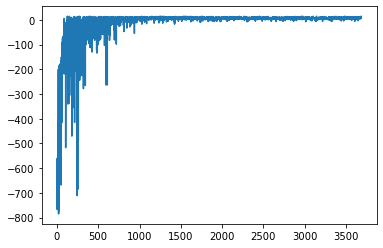

In [7]:
def play_episode(env, agent, seed=None, mode=None, render=False):
    observation, _ = env.reset(seed=seed)
    reward, terminated, truncated = 0., False, False
    agent.reset(mode=mode)
    episode_reward, elapsed_steps = 0., 0
    while True:
        action = agent.step(observation, reward, terminated)
        if render:
            env.render()
        if terminated or truncated:
            break
        observation, reward, terminated, truncated, _ = env.step(action)
        episode_reward += reward
        elapsed_steps += 1
    agent.close()
    return episode_reward, elapsed_steps


logging.info('==== train ====')
episode_rewards = []
for episode in itertools.count():
    episode_reward, elapsed_steps = play_episode(env, agent, seed=episode,
            mode='train')
    episode_rewards.append(episode_reward)
    logging.info('train episode %d: reward = %.2f, steps = %d',
            episode, episode_reward, elapsed_steps)
    if np.mean(episode_rewards[-200:]) > env.spec.reward_threshold:
        break
plt.plot(episode_rewards)


logging.info('==== test ====')
episode_rewards = []
for episode in range(100):
    episode_reward, elapsed_steps = play_episode(env, agent)
    episode_rewards.append(episode_reward)
    logging.info('test episode %d: reward = %.2f, steps = %d',
            episode, episode_reward, elapsed_steps)
logging.info('average episode reward = %.2f ± %.2f',
        np.mean(episode_rewards), np.std(episode_rewards))

Show optimal action values

In [8]:
pd.DataFrame(agent.q)

,0,1,2,3,4,5
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-3.888370,-2.428275,-3.840813,-3.869057,1.463894,-7.105529
2,-2.389215,-1.607294,-0.545622,-2.321076,7.614024,-5.311750
3,-2.987418,-3.694068,-2.427408,-3.715344,2.768160,-5.187225
4,-5.548554,-6.237565,-6.180516,-6.218690,-7.070804,-7.105577
...,...,...,...,...,...,...
495,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
496,-2.283511,-2.405395,-2.332837,-2.303836,-3.600000,-3.636000
497,-1.366296,9.600490,-1.394897,-0.376324,-3.600000,-3.218121
498,-2.559684,-2.452413,-2.589624,-2.523476,-3.600000,-3.636000


Show optimal policy

In [9]:
policy = np.eye(agent.action_n)[agent.q.argmax(axis=-1)]
pd.DataFrame(policy)

,0,1,2,3,4,5
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
495,1.0,0.0,0.0,0.0,0.0,0.0
496,1.0,0.0,0.0,0.0,0.0,0.0
497,0.0,1.0,0.0,0.0,0.0,0.0
498,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
env.close()